In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt

In [2]:
# Sample data for suppliers, mills, and customers
data = {
    'Name': ['Supplier A', 'Mill X', 'Customer Y', 'Customer Z'],
    'Type': ['Supplier', 'Mill', 'Customer', 'Customer'],
    'Latitude': [45.0, 46.0, 47.0, 48.0],
    'Longitude': [-75.0, -74.5, -74.0, -73.5]
}
df = pd.DataFrame(data)

In [3]:
# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

In [5]:
m = folium.Map(location=[46.5, -74.5], zoom_start=6)
marker_cluster = MarkerCluster().add_to(m)

for idx, row in gdf.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Name']} ({row['Type']})",
        icon=folium.Icon(color="blue" if row['Type'] == "Supplier" else "green" if row['Type'] == "Mill" else "red")
    ).add_to(marker_cluster)

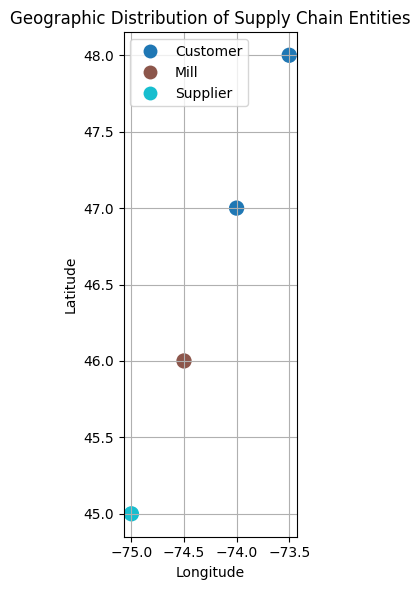

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
gdf.plot(ax=ax, column='Type', legend=True, markersize=100)
plt.title("Geographic Distribution of Supply Chain Entities")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()